# Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between the dependent and independent variables, they are considering and the number of independent variables being used.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
df=pd.read_csv('gdrive/My Drive/MLdatasets/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


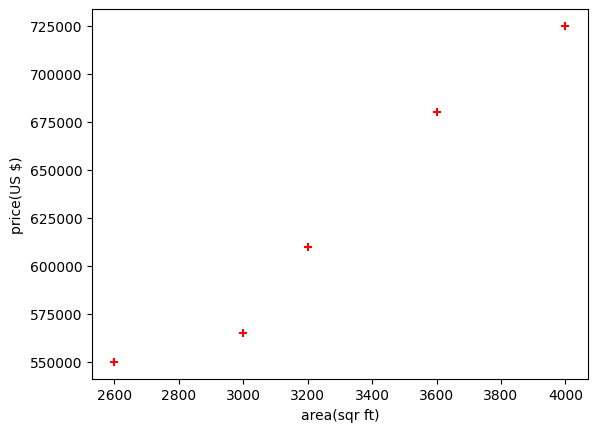

In [11]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US $)')
plt.scatter(df.area, df.price, color='red', marker='+')


In [21]:
new_df = df.drop('price',axis='columns')
new_df


,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [22]:
price = df.price
price


,price
0,550000
1,565000
2,610000
3,680000
4,725000


# Linear Regression



```
price = m * area + b
y = mx + b
```
where,
m = Slope (or Gradient)
b = y - intercept



In [25]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)


LinearRegression()

## **(1) Predict price of a home with area = 3300 sqr ft**

In [28]:
reg.predict([[3300]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

**coefficient** - the amount by which change in x must be multiplied to give the corresponding average change in y, or the amount y changes for a unit increase in x

In [27]:
reg.coef_

array([135.78767123])

**Intercept** -  intercept represents the predicted value of the dependent variable (Y) when all independent variables (X) are equal to zero. It's the point where the regression line crosses the Y-axis.

In [29]:
reg.intercept_

np.float64(180616.43835616432)

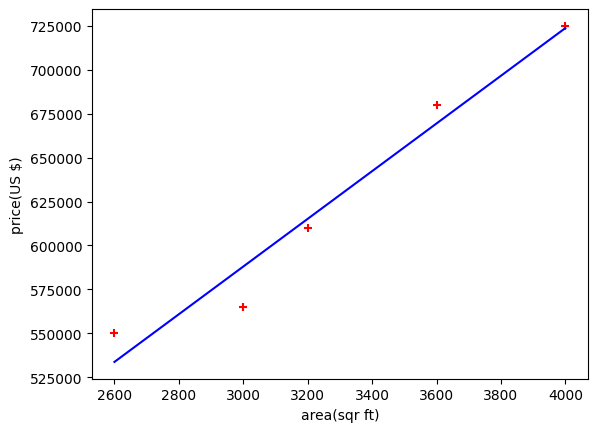

In [43]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US $)')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

## Generate CSV file with list of home price predictions

In [31]:
df2 = pd.read_csv('gdrive/My Drive/MLdatasets/areas.csv')
df2.head(3)

,area
0,1000
1,1500
2,2300


In [33]:
p = reg.predict(df2)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [37]:
df2['prices'] = p
df2

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [39]:
df2.to_csv("prediction.csv", index=False) # save file locally

In [42]:
df.to_csv('gdrive/My Drive/MLdatasets/output/prediction.csv', index=False)  # save file directly on drive